<a href="https://colab.research.google.com/github/arieles08/TP1_DMCyT/blob/main/Pre_TP_DM_CyT_Grupo4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-TP - DM en Ciencia y Tecnología

> **Preprocesamiento de imágenes**


### Librerias y Paquetes

In [ ]:
pip install Clustimage -q gwpy

     |████████████████████████████████| 1.4 MB 6.7 MB/s 
     |████████████████████████████████| 296 kB 47.3 MB/s 
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
     |████████████████████████████████| 11.2 MB 42.5 MB/s 
     |████████████████████████████████| 51 kB 4.3 MB/s 
     |████████████████████████████████| 4.0 MB 37.9 MB/s 
     |████████████████████████████████| 959 kB 47.6 MB/s 
     |████████████████████████████████| 1.1 MB 44.9 MB/s 


In [ ]:

pip install matplotlib==3.1.3 -q gwpy

     |████████████████████████████████| 13.1 MB 3.8 MB/s 
     |████████████████████████████████| 1.4 MB 52.4 MB/s 
     |████████████████████████████████| 1.4 MB 50.1 MB/s 
     |████████████████████████████████| 1.4 MB 54.5 MB/s 
     |████████████████████████████████| 1.4 MB 45.3 MB/s 
     |████████████████████████████████| 1.4 MB 72.7 MB/s 
     |████████████████████████████████| 1.4 MB 47.5 MB/s 
     |████████████████████████████████| 1.4 MB 37.7 MB/s 


In [ ]:
from clustimage import Clustimage
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import numpy as np
import math

## 4. Preprocesamiento de los datos

### 4.1 Carga el dataset y sus etiquetas
Cargar el dataset y sus respectivas etiquetas. 

Es importante asegurarse que las imágenes sean comparables en color, valor, rango y tamaño. --> esto NO se hizo

In [ ]:
# Accessing My Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **PASO 1: Crear listado con la "Ruta / Path" para cada imagen**

In [ ]:
# PASO 1.1: Crear variable "image_path" con la ruta de la carpeta "flower_images" donde estan --> Nota: CAMBIAR RUTA DE ARCHIVOS A LA DE CADA UNO
!gdown --id 
image_path = "/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images" #PONER EL PATH DE CADA UNO 
#             -> /content/drive/MyDrive/Colab Notebooks/flower_images/flower_images

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: the following arguments are required: url_or_id


In [ ]:
# PASO 1.2: Creo una lista con los nombres de las 210 imágenes que se encuentran en la carpeta ""flower_images" (png)
path = sorted([os.path.join(image_path, file)
                          for file in os.listdir(image_path )
                          if file.endswith('.png')])
print(len(path))
path[0:5]

210


['/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images/0001.png',
 '/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images/0002.png',
 '/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images/0003.png',
 '/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images/0004.png',
 '/content/drive/MyDrive/Colab Notebooks/! 05. DM en Ciencia y Tecnologia/Dataset/flower_images/flower_images/0005.png']

##### **PASO 2: Cargar el archivo con las Etiquetas (labels) correspondiente a cada imagen**

In [ ]:
#PASO 2.1: Cargar el archivo con las etiquetas (labels) -> df_etiquetas
file_nm = '/flower_labels.csv'
ruta = image_path + file_nm

df_etiquetas = pd.read_csv(ruta)
print(len(df_etiquetas))
df_etiquetas.head()

210


,file,label
0,0001.png,0
1,0002.png,0
2,0003.png,2
3,0004.png,0
4,0005.png,0


**Exploración:** vemos cuantas etiquetas tenemos (= tipo de flores) y la cantidad de ejemplos para cada una

In [ ]:
# Listado de las 10 etiquetas (tipo de flores) -> etiquetas
etiquetas = np.sort(df_etiquetas.label.unique())
etiquetas

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# ¿Cuantos ejemplos (imagenes) tengo para cada especie?
Q = df_etiquetas['label'].value_counts().rename("Cant")
P = 100*df_etiquetas['label'].value_counts(normalize=True).round(2).rename("%")

pd.concat([Q, P], axis=1).sort_index()

,Cant,%
0,21,10.0
1,20,10.0
2,19,9.0
3,22,10.0
4,21,10.0
5,25,12.0
6,23,11.0
7,15,7.0
8,26,12.0
9,18,9.0


### 4.2 Explorar y graficar las imágenes de flores
Explorar y graficar los subconjuntos de imágenes que representan flores de la misma especie.

##### AUX: **Seleccionando ejemplos** para cada especie **dentro del listado 'path'**, creado en el paso anterior

In [ ]:
#Lista que TRAE "La Posicion de 0 a 209 (index)" para TODOS LOS EJEMPLOS que hay par la MISMA ESPECIE
especie = 0   #valores de 0 a 9
filtro_especie = ( df_etiquetas.label == especie )

ej_misma_esp = df_etiquetas.label[filtro_especie]

In [ ]:
#DataFrame con la posición para de TODOS los ejemplos (una por fila) para TODAS LAS ESPECIES (una por columna) -> df_ejemplos
cant_especies = len(df_etiquetas.label.unique())
list_ej = []

for i in range(cant_especies):
  especie = i
  filtro_especie = ( df_etiquetas.label == especie )
  ej_misma_esp = df_etiquetas.index[filtro_especie].tolist()
  list_ej.append(ej_misma_esp)
  
df_ejemplos = pd.DataFrame(list_ej).transpose()
df_ejemplos.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,5.0,2.0,30.0,21.0,24.0,6.0,13.0,35.0,37.0
1,1.0,15.0,20.0,34.0,23.0,27.0,18.0,14.0,39.0,40.0
2,3.0,41.0,26.0,43.0,45.0,32.0,25.0,22.0,48.0,53.0
3,4.0,44.0,38.0,47.0,51.0,36.0,28.0,42.0,57.0,70.0
4,7.0,49.0,60.0,50.0,69.0,56.0,29.0,46.0,59.0,72.0


##### **GRAFICO 1: Con 1 ejemplo para cada una de las 10 especies**

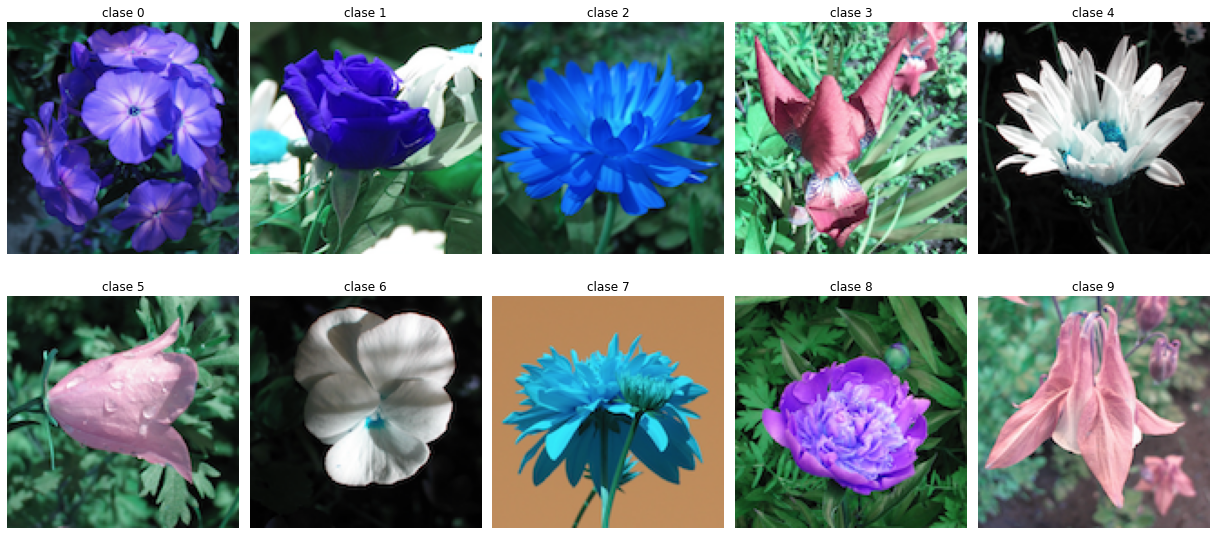

In [ ]:
# Grafico con 1 EJEMPLO DE CADA ESPECIE -> desde el dataframe 'df_ejemplos'
ej_n = 0  #valores de 0 a 14
 
ejemplos = df_ejemplos.iloc[ej_n, :].astype(int)

cl = Clustimage()

plt.figure(figsize = (17,8))
for i in range(len(ejemplos)):
  img = cl.imread(path[ejemplos[i]], dim=(128,128),colorscale=1) #Levanta la imagen
  plt.subplot(2,5,i+1)
  plt.title("clase" + ' ' + str(etiquetas[i]))
  imagen = img.reshape(128,128,3)
  plt.imshow(imagen)
  plt.axis('off')
plt.tight_layout()

##### **Gráfico 2: con N ejemplos para LA MISMA especie**

In [ ]:
# Grafico con N ejemplos de UNA MISMA ESPECIA -> desde el dataframe 'df_ejemplos'
cant_ej = 3 #valores de 1 a 15
especie = 0

ejemplos2 = df_ejemplos.iloc[:cant_ej, especie].astype(int)

etiquetas = np.sort(df_etiquetas.label.unique())
n = len(etiquetas)
cl = Clustimage()

f = math.ceil(cant_ej/5)

plt.figure(figsize = (17, f*4))
for i in range(len(ejemplos2)):
  img = cl.imread(path[ejemplos2[i]], dim=(128,128),colorscale=1) #Levanta la imagen
  plt.subplot(f,5,i+1)
  plt.title("clase " + str(especie)+ "  -  ej: " + str(i+1) )
  imagen = img.reshape(128,128,3)
  plt.imshow(imagen)
  plt.axis('off')
plt.tight_layout()

##### **Gráfico 3: con 5 ejemplos para CADA una de las 10 ESPECIES**

In [ ]:
etiquetas[3:]

In [ ]:
# Grafico con N ejemplos de LA MISMA ESPECIE -> desde el dataframe 'df_ejemplos'
etiquetas = np.sort(df_etiquetas.label.unique())
n = len(etiquetas[0:2])

c = 5 #cantidad de ejemplos a graficar

ejemplos2 = df_ejemplos.iloc[:c, :].astype(int)

e = 0   #especies (aux p/ for)
ej = 1  #ejemplos (aux p/ for)
cl = Clustimage()
plt.figure(figsize = ((c*3),(n*3)))
for i in range(c*n):
  img = cl.imread(path[ejemplos2.iloc[(ej-1),e]], dim=(128,128),colorscale=1) #Levanta la imagen
  plt.subplot(n,5,i+1)
  plt.title("clase " + str(etiquetas[e]) + "  -  ej: " + str(ej))
  imagen = img.reshape(128,128,3)
  plt.imshow(imagen)
  plt.axis('off')
  if (i+1) == (e+1)*c:
    e = e + 1
  if ej >= c:
    ej = 0
  ej = ej + 1
plt.tight_layout()

In [ ]:
# Grafico con N ejemplos de LA MISMA ESPECIE -> desde el dataframe 'df_ejemplos'
etiquetas = np.sort(df_etiquetas.label.unique())
n = len(etiquetas[2:])

c = 5 #cantidad de ejemplos a graficar7
ejemplos2 = df_ejemplos.iloc[:c, 2:].astype(int)

e = 0   #especies (aux p/ for)
ej = 1  #ejemplos (aux p/ for)
cl = Clustimage()
plt.figure(figsize = ((c*3),(n*3)))
for i in range(c*n):
  img = cl.imread(path[ejemplos2.iloc[(ej-1),e]], dim=(128,128),colorscale=1) #Levanta la imagen
  plt.subplot(n,5,i+1)
  plt.title("clase " + str(etiquetas[e+2]) + "  -  ej: " + str(ej))
  imagen = img.reshape(128,128,3)
  plt.imshow(imagen)
  plt.axis('off')
  if (i+1) == (e+1)*c:
    e = e + 1
  if ej >= c:
    ej = 0
  ej = ej + 1
plt.tight_layout()

## 5. Manipulación de datos

### 5.1 Cambio de intensidad del brillo
Cambiar la intensidad de una de las imágenes en escala de grises, transformarla en una imagen con mucho y otra con poco brillo.

In [ ]:
# Seleccion de ejemplo a modificar:
especie = 2  # 0 a 9
n_ej= 3     # 0 a 14

ie = df_ejemplos.iloc[n_ej,especie].astype(int)

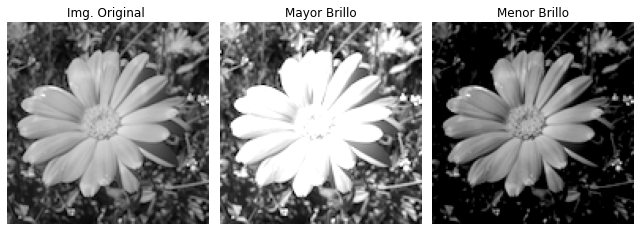

In [ ]:
# Se imprime en blanco y negro y se mofican el valor del brillo
mas_brillo = 150
menos_brillo = 80


plt.figure(figsize = ((3*3),4))
#Imagen Original
img = cl.imread(path[ie], dim=(128,128),colorscale=0) #Levanta la imagen
arr = img

img1 = np.array([num for num in arr]) #no es necesario -> lo agrego para ver como se reempra expresada esa imagen en un array
plt.subplot(1,3,1)
plt.title("Img. Original ")
imagen = img1.reshape(128,128)
plt.imshow(imagen, cmap='gray')
plt.axis('off')

#Imagen con aumento de brillo
arr=img
img2=np.array([min([round(num*(mas_brillo/100)), 255]) for num in arr])
plt.subplot(1,3,2)
plt.title("Mayor Brillo")
imagen2 = img2.reshape(128,128)
plt.imshow(imagen2, cmap='gray')
plt.axis('off')

#Imagen con menos brillo
arr=img
img3=np.array([max([round(num - menos_brillo), 0]) for num in arr])
plt.subplot(1,3,3)
plt.title("Menor Brillo")
imagen3 = img3.reshape(128,128)
plt.imshow(imagen3, cmap='gray')
plt.axis('off')

plt.tight_layout()

### 5.2 Conversion a blanco y negro Binario
Convertir una de las imágenes a blanco y negro (binario). ¿Es la única manera? Si existen otras transformaciones mostrar más de una conversión.


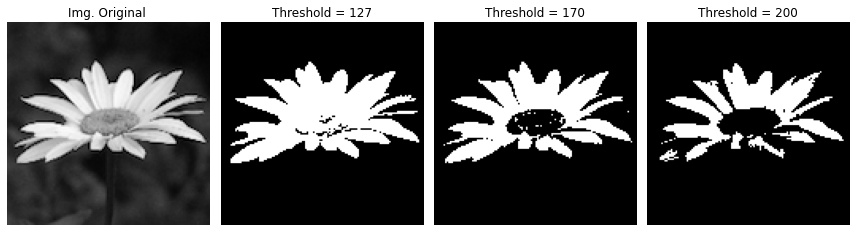

In [ ]:
# Se transforma el rango de valores de cada pixel que va de 0 a 255 en un RANGO BINARIO de 0 (blanco) o 255 (negro)
# para esto se fija un Threshold por encima del cual esta en Negro y debajo en Blanco -> infinitas posibilidades segun el valor del Threshold establecido

# -> Thresholds usados: 90, 127, 180, 200

n_ej = 45 #ejemplo numero... de la carpeta de imagenes

plt.figure(figsize = ((3*4),4))
#Imagen Original
img = cl.imread(path[n_ej], dim=(128,128),colorscale=0) #Levanta la imagen
arr = img

img1 = np.array([num for num in arr]) #no es necesario -> lo agrego para ver como se reempra expresada esa imagen en un array
plt.subplot(1,4,1)
plt.title("Img. Original ")
imagen = img1.reshape(128,128)
plt.imshow(imagen, cmap='gray')
plt.axis('off')


#Imagen con menos brillo
arr=img
img3=np.array([int(num>90)*255 for num in arr])
plt.subplot(1,4,3)
plt.title("Threshold = 90")
imagen3 = img3.reshape(128,128)
plt.imshow(imagen3, cmap='gray')
plt.axis('off')

#Imagen con aumento de brillo
arr=img
img2=np.array([round(num/255)*255 for num in arr])
plt.subplot(1,4,2)
plt.title("Threshold = 127")
imagen2 = img2.reshape(128,128)
plt.imshow(imagen2, cmap='gray')
plt.axis('off')

#Imagen con menos brillo
arr=img
img3=np.array([int(num>170)*255 for num in arr])
plt.subplot(1,4,3)
plt.title("Threshold = 170")
imagen3 = img3.reshape(128,128)
plt.imshow(imagen3, cmap='gray')
plt.axis('off')

#Imagen con menos brillo
arr=img
img4=np.array([int(num>200)*255 for num in arr])
plt.subplot(1,4,4)
plt.title("Threshold = 200")
imagen4 = img4.reshape(128,128)
plt.imshow(imagen4, cmap='gray')
plt.axis('off')

plt.tight_layout()

### 5.3 Recortar el Centro
Recortar una parte significativa de la imagen, quedándose sólo con el círculo centralde la misma.

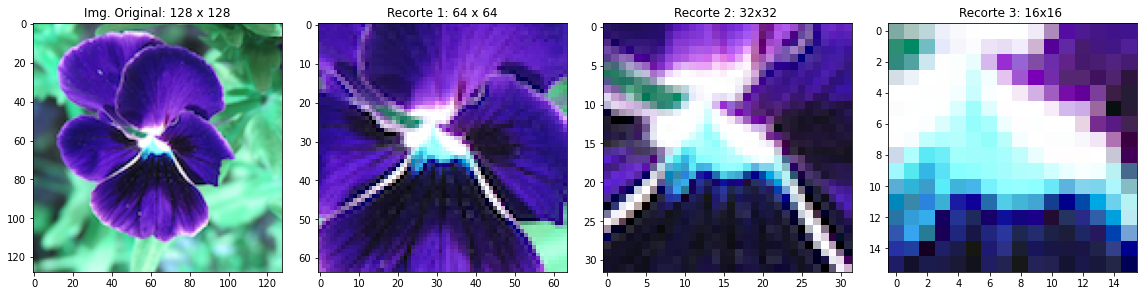

In [ ]:
# SE recorta la imagen, haciendo una selección

n_ej = 29 #ejemplo numero... de la carpeta de imagenes

#Cargo la imagen de ejemplo
img = cl.imread(path[n_ej], dim=(128,128),colorscale=1) #Levanta la imagen

plt.figure(figsize = ((4*4),4))

#Grafico la original
plt.subplot(1,4,1)
plt.title("Img. Original: 128 x 128")
imagen = img.reshape(128,128,3)
plt.imshow(imagen, cmap='gray')

#1er Recorte de 64 x 64 centrado en el punto (64,64)
  # -> low = 64 - 32 = 32
  # -> up  = 64 + 32 = 96
plt.subplot(1,4,2)
plt.title("Recorte 1: 64 x 64")
imagen1 = imagen[32:96,32:96]
plt.imshow(imagen1)

#2do Recorte de 32 x 32 centrado en el punto (64,64)
  # -> low = 64 - 16 = 48
  # -> up  = 64 + 16 = 80
plt.subplot(1,4,3)
plt.title("Recorte 2: 32x32" + ' ')
imagen2 = imagen[48:80,48:80]
plt.imshow(imagen2)

#3er Recorte de 16 x 16 centrado en el punto (64,64)
  # -> low = 64 - 8 = 56
  # -> up  = 64 + 8 = 72
plt.subplot(1,4,4)
plt.title("Recorte 3: 16x16" + ' ')
imagen3 = imagen[56:72,56:72]
plt.imshow(imagen3)

plt.tight_layout()

### 5.3 Mezcla random de pixel y partes de imagen
Generar dos imágenes random: una imagen mezclando los pixels y otra mezclando
partes de diferentes imágenes.

Una imagen mezclando los pixeles

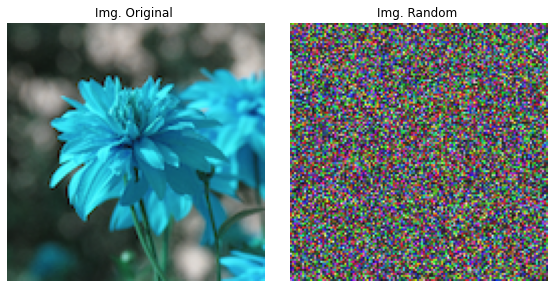

In [ ]:
n_ej = 42 #ejemplo numero... de la carpeta de imagenes

plt.figure(figsize = ((8),4))
#Imagen Original
img = cl.imread(path[n_ej], dim=(128,128),colorscale=1) #Levanta la imagen

plt.subplot(1,2,1)
plt.title("Img. Original ")
imagen = img.reshape(128,128,3)
plt.imshow(imagen)
plt.axis('off')

random.shuffle(img)

plt.subplot(1,2,2)
plt.title("Img. Random ")
imagen = img.reshape(128,128,3)
plt.imshow(imagen)
plt.axis('off')

plt.tight_layout()

Mezclando partes de diferentes imágenes

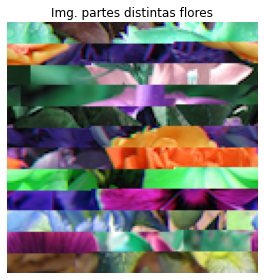

In [ ]:
#Mezclo 12 partes de diferentes imagenes 

imagen =[]
for i in range(12):
      a=random.randint(0,48128)
      b=a+4096
      img = cl.imread(path[random.randint(0, 209)], dim=(128,128),colorscale=1)
      imagen.append(img[a:b])
     
imagen= np.array(imagen)
imagen_mezcla = imagen.reshape(128,128,3)
plt.title("Img. partes distintas flores")
plt.imshow(imagen_mezcla)
plt.axis('off')
plt.tight_layout()


### 5.4 Aplicar 2 tipos de Filtros
Aplicar dos tipos diferentes de filtros sobre una imagen, explique en qué casos conviene usar cada uno.

Filtro de medianas

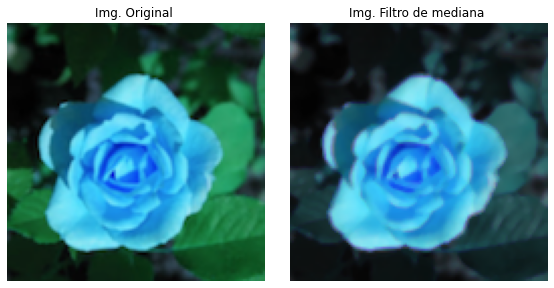

In [ ]:
from scipy.ndimage import median_filter
n_ej = 156 #ejemplo numero... de la carpeta de imagenes

plt.figure(figsize = ((8),4))
#Imagen Original
img = cl.imread(path[n_ej], dim=(128,128),colorscale=1) #Levanta la imagen

plt.subplot(1,2,1)
plt.title("Img. Original ")
imagen = img.reshape(128,128,3)
plt.imshow(imagen)
plt.axis('off')

#Mejor resultado para zonas de frontera rectas
plt.subplot(1,2,2)
plt.title("Img. Filtro de mediana ")
imagen_filtro_medio = median_filter(imagen,size=3)
plt.imshow(imagen_filtro_medio)
plt.axis('off')

plt.tight_layout()

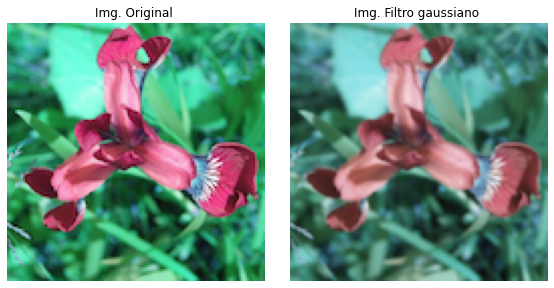

In [ ]:
from scipy.ndimage import gaussian_filter
n_ej = 201 #ejemplo numero... de la carpeta de imagenes

plt.figure(figsize = ((8),4))
#Imagen Original
img = cl.imread(path[n_ej], dim=(128,128),colorscale=1) #Levanta la imagen

plt.subplot(1,2,1)
plt.title("Img. Original ")
imagen = img.reshape(128,128,3)
plt.imshow(imagen)
plt.axis('off')

#Desenfoque
plt.subplot(1,2,2)
plt.title("Img. Filtro gaussiano ")
imagen_filtro_gaussiano = gaussian_filter(imagen,0.6)
plt.imshow(imagen_filtro_medio)
plt.axis('off')

plt.tight_layout()

### 5.5 Calcular Imagen Promedio
Calcular imagen promedio global y el promedio entre las distintas especies. 
¿Se pueden distinguir los promedios? 
¿Cómo quedan los promedios si consideran las imágenes en blanco y negro?

##### **Promedio Global**

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


(-0.5, 127.5, 127.5, -0.5)

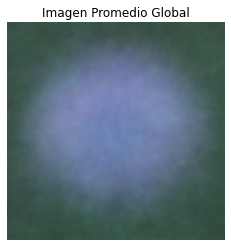

In [ ]:
#Imagen Promedio Global
img_sum = np.zeros(shape=(128,128,3))
n = len(path)
for i in range(n):
  img = cl.imread(path[i], dim=(128,128),colorscale=1) #Levanta la imagen
  imagen = img.reshape(128,128,3)
  img_sum = imagen + img_sum

img_avg = np.round(img_sum/n).astype(int)
plt.title("Imagen Promedio Global")
plt.imshow(img_avg)
plt.axis('off')

##### **Promedio por especie**

In [ ]:
ej_misma_esp[0]

37

In [ ]:
ej_misma_esp = df_etiquetas.index[filtro_especie]

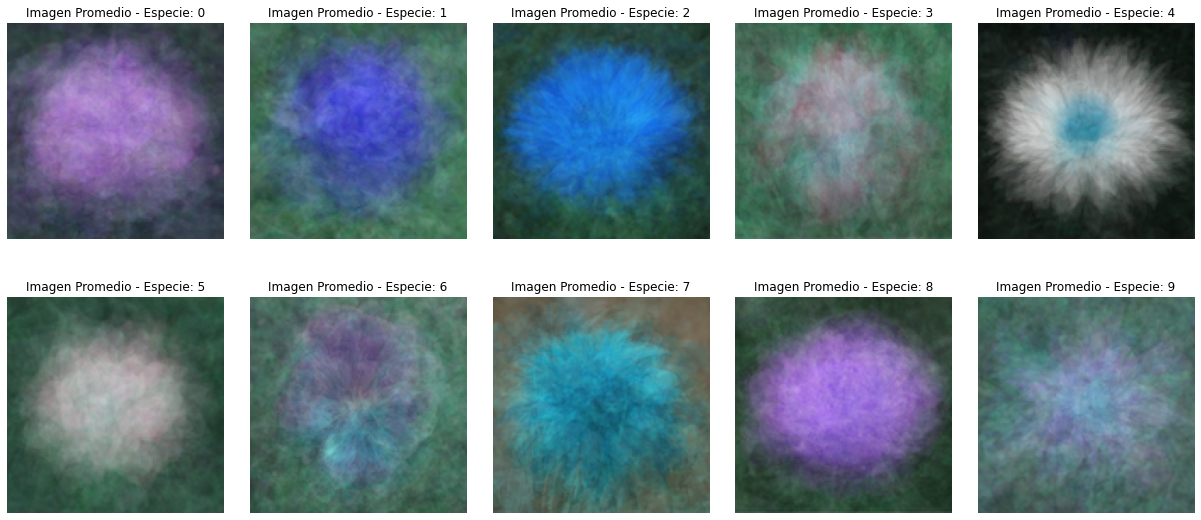

In [ ]:
#Imagen Promedio por Especie
especie = 0
plt.figure(figsize = (17,8))
for j in range(len(etiquetas)):
  especie = j   #valores de 0 a 9
  filtro_especie = ( df_etiquetas.label == especie )
  ej_misma_esp = df_etiquetas.index[filtro_especie]
  
  img_sum = np.zeros(shape=(128,128,3))
  n = len(ej_misma_esp)
  for i in range(n):
    img = cl.imread(path[ej_misma_esp[i]], dim=(128,128),colorscale=1) #Levanta la imagen
    imagen = img.reshape(128,128,3)
    img_sum = imagen + img_sum
  
  img_avg = np.round(img_sum/n).astype(int)

  plt.subplot(2,5,j+1)
  plt.title("Imagen Promedio - Especie: "+ str(j))
  plt.imshow(img_avg)
  plt.axis('off')
plt.tight_layout()

## 6. Búsqueda de features

### 6.1 Analizar distribuciones de pixeles por especie
Analizar las distribuciones de valores de pixels por cada especie. 
¿Se puede distinguir una especie en algún rango de color?

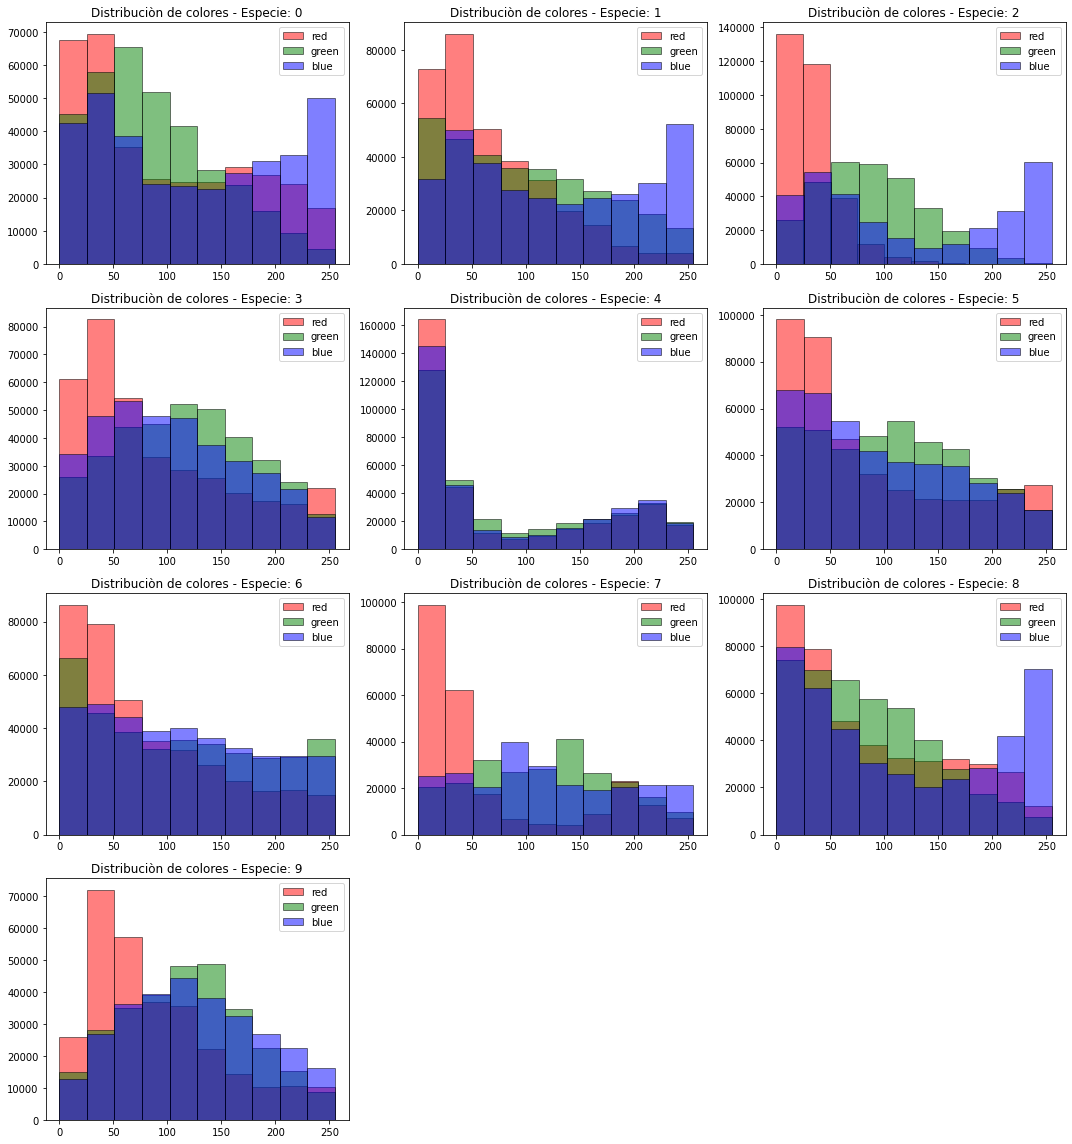

In [ ]:
#LEANDRO: haciendo con arrays para tener valores de todas las imagenes (NO promedio)
especie = 0
plt.figure(figsize = (15,16))
for j in range(len(etiquetas)):
  especie = j   #valores de 0 a 9
  filtro_especie = ( df_etiquetas.label == especie )
  ej_misma_esp = df_etiquetas.index[filtro_especie]

  n = len(ej_misma_esp)
  arr_red = np.empty(shape=(0,1))
  arr_green = np.empty(shape=(0,1))
  arr_blue = np.empty(shape=(0,1))
  for i in range(n):
    img = cl.imread(path[ej_misma_esp[i]], dim=(128,128),colorscale=1) #Levanta la imagen
    imagen = img.reshape(128,128,3)
    img_red = imagen[:,:,0]
    img_green = imagen[:,:,1]
    img_blue = imagen[:,:,2]
    
    arr_red = np.concatenate((arr_red,img_red.reshape(128*128,1)),axis=0)
    arr_green = np.concatenate((arr_green,img_green.reshape(128*128,1)),axis=0)
    arr_blue = np.concatenate((arr_blue,img_blue.reshape(128*128,1)),axis=0)

  plt.subplot(4,3,j+1)
  plt.title("Distribuciòn de colores - Especie: "+ str(especie))
  plt.hist(arr_red,color="red",bins=10,edgecolor='k',alpha=0.5,label="red")
  plt.hist(arr_green,color="green",bins=10,edgecolor='k',alpha=0.5,label="green")
  plt.hist(arr_blue,color="blue",bins=10,edgecolor='k',alpha=0.5,label="blue")
  plt.legend()
plt.tight_layout()

### 6.2 Representacion PCA . Renso:Revisar
Realizar una inspección de las componentes principales del dataset y analizar si se pueden identificar las especies en esta representación.

In [ ]:
imagenes =[]
for i in range(len(path)):
  img = cl.imread(path[i], dim=(128,128),colorscale=1)
  imagenes.append(img)

X = pd.DataFrame(imagenes)
Y = df_etiquetas['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)



In [ ]:
X.shape

(210, 49152)

In [ ]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2)
components = PCA.fit_transform(X)
PCA.components_

array([[-5.84558693e-03, -4.94057051e-03, -3.39477593e-03, ...,
        -1.89194601e-03, -1.49262627e-03, -6.54357715e-05],
       [-1.98713336e-03,  2.87433025e-03, -2.24357849e-03, ...,
        -2.34351524e-03,  3.25400631e-03,  7.48262671e-04]])

In [ ]:
cumVar = pd.DataFrame(np.cumsum(PCA.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(PCA.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2", 2: "PC3", 3: "PC4"})

,VarPerc,cumVarPerc
PC1,5.127185,5.127185
PC2,3.797799,8.924984


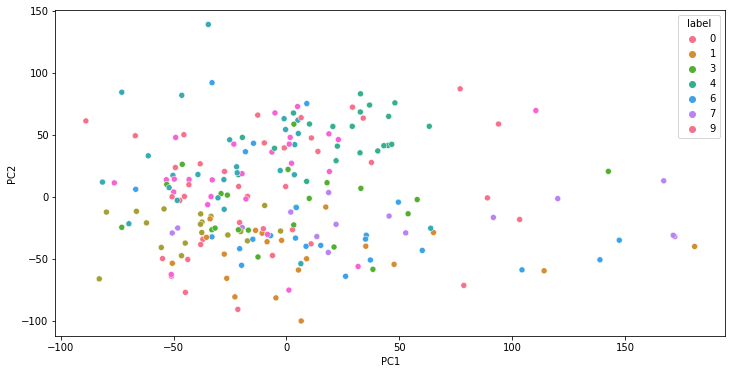

In [ ]:
import seaborn as sns

componentsDf = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])
pcaDf = pd.concat([componentsDf, Y], axis=1)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2", hue="label", palette= "husl")